In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from mlxtend.data import loadlocal_mnist

In [2]:
def process_mnist_data() -> (np.ndarray, np.ndarray, np.ndarray, np.ndarray):
    mnist_path = './MNIST/'
    train_images, train_labels = loadlocal_mnist(
        images_path = mnist_path + './train-images.idx3-ubyte',
        labels_path = mnist_path + './train-labels.idx1-ubyte'
    )
    test_images, test_labels = loadlocal_mnist(
        images_path = mnist_path + './t10k-images.idx3-ubyte',
        labels_path = mnist_path + './t10k-labels.idx1-ubyte'
    )
    return train_images, train_labels, test_images, test_labels

In [3]:
def unpickle(file):
    with open(file, 'rb') as fo:
        data_dict = pickle.load(fo, encoding='bytes')
    return data_dict

In [4]:
def process_cifar_dataset():
    cifar_path = './cifar-10-python/cifar-10-batches-py'
    for i in range(1,6):
        data_batch = unpickle(cifar_path + '/data_batch_' + str(i))
        print(data_batch.keys())
        train_images, train_labels  = data_batch[b'data'], data_batch[b'labels']

In [5]:
def process_toy_dataset():
    toy_dataset_path = './Toy Dataset/'

In [6]:
class ConvolutionLayer:
    def __init__(self, output_channel_count:int, filter_dimension:int, stride:int, padding:int):
        self.output_channel_count = output_channel_count
        self.filter_dimension = filter_dimension
        self.filters = np.random.random((
            self.output_channel_count,
            self.filter_dimension,
            self.filter_dimension
        ))
        self.stride = stride
        self.padding = padding

    def forward(self, input_image: np.ndarray):
        input_dimentions = input_image.shape[0]
        output_dimentions = (input_dimentions - self.filter_dimension + 2 * self.padding) // self.stride + 1
        input_shape = input_image.shape

        # Pad the image
        padded_image = np.zeros((
            input_shape[0]+self.padding,
            input_shape[1]+self.padding,
            input_shape[2]
        ))

        # Padding variables
        x_min = self.padding
        x_max = x_min + input_shape[0]
        y_min = self.padding
        y_max = y_min + input_shape[1]

        padded_image[x_min:x_max, y_min:y_max, :] = input_image
        padded_dimensions = padded_image.shape

        output = np.zeros((self.output_channel_count, output_dimentions, output_dimentions))

        for i in range(self.output_channel_count):
            image_y = out_y = 0
            while image_y + self.filter_dimension <= padded_dimensions[1]:
                image_x = out_x = 0
                while image_x + self.filter_dimension <= padded_dimensions[0]:
                    image_slice = padded_image[image_x:image_x+self.filter_dimension, image_y:image_y+self.filter_dimension, :]
                    output[i, out_x, out_y] = np.sum(image_slice * self.filters[i])
                    image_x += self.stride
                    out_x += 1
                image_y += self.stride
                out_y += 1
                
        return output
    
    def backward(self):
        pass

In [7]:
class ActivationLayer:
    pass

In [8]:
class MaxPoolingLayer:
    pass

In [9]:
class FullyConnectedLayer:
    pass

In [10]:
class FlatteningLayer:
    pass

In [11]:
class SoftmaxLayer:
    pass

3


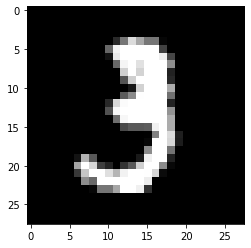

In [12]:
x_train, y_train, x_test, y_test = process_mnist_data()
img = x_train[10].reshape(28, 28)
plt.imshow(img, cmap='gray')
print(y_train[10])